In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn import linear_model

In [2]:
df=pd.read_csv("HomePrice.csv")
df

,Area,Price
0,100,600000
1,200,1150000
2,50,400000
3,60,500000
4,150,850000
5,300,2100000
6,75,900000


In [3]:
df.dtypes

Area     int64
Price    int64
dtype: object

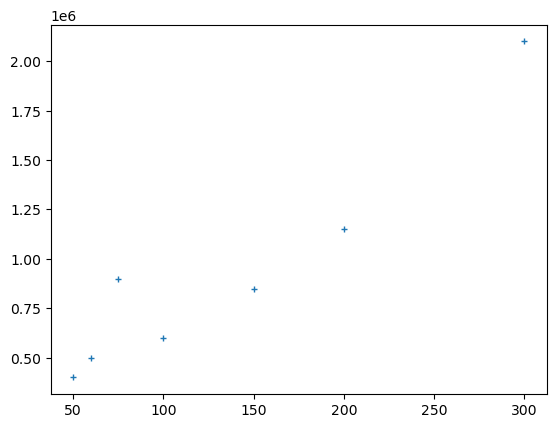

In [4]:
plt.plot(df["Area"],df["Price"],linestyle="",marker="+",markersize=5)

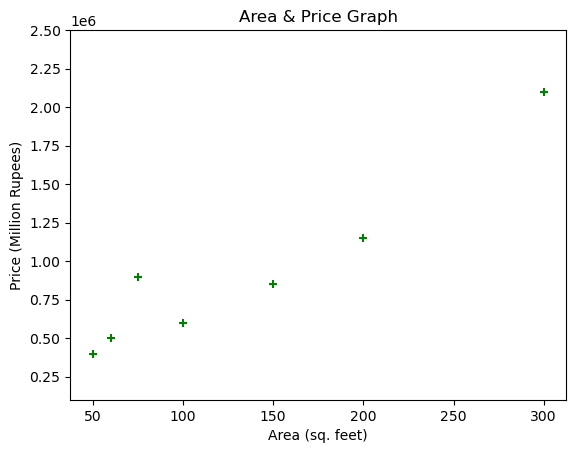

In [5]:
plt.scatter(df.Area,df.Price,marker="+",color="g") #Another way to visualize the data
plt.xlabel("Area (sq. feet)")
plt.ylabel("Price (Million Rupees)")
plt.title("Area & Price Graph")
plt.ylim(100000,2500000)       #plt.ylim(ymin=100000,ymax=2500000)
ax=plt.gca()
# adjust the y axis scale.
ax.locator_params('y', nbins=10)

In [6]:
rg=linear_model.LinearRegression()  #Create a linear regression object named rg

In [7]:
rg.fit(df[["Area"]],df.Price)              # Train the model

LinearRegression()

In [8]:
rg.predict([[700]])

C:\Users\PC\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4335999.71043869])

Now, let's justify this value

It was able to predict the price of House with the help of sploe(m) and intercept (c)            
y = mx + c         
y : Dependent Variable (Price)        
m : slope            
x : Independent Variable (Area)         
c : Intercept 

Let's find out, what are the values of m (coeficient) and c

In [9]:
rg.coef_  # Value of m

array([6015.63631099])

In [10]:
rg.intercept_   # Value of c

125054.29274648882

In [11]:
# y = mx + c
price = 6015.63631099 * 700 + 125054.29274648882
price

4335999.710439489

Hence, we got the same price for 700 sq feet house as we were getting through predict function

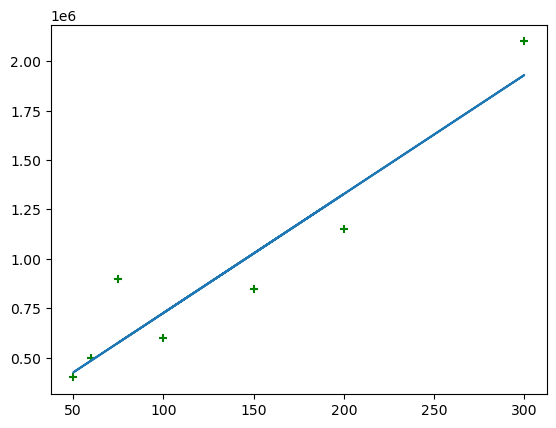

In [12]:
plt.scatter(df.Area,df.Price,marker="+",color="g")
plt.plot(df.Area,rg.predict(df[["Area"]]))

This blue line is nothing but a best fit line across this dataset

## Let's save this trained model to a file for future prediction

In [13]:
import pickle

In [14]:
with open("model_pickle",'wb') as f:
    pickle.dump(rg,f)
    


* Now, our model has been saved into a binary file named model_pickle.
* we can load this model later and start prediction with out any prior training.

## Let's load this model again...

In [15]:
with open("model_pickle","rb") as f:
 mp=pickle.load(f)

### Do some prediction :-

In [16]:
mp.predict([[700]])

C:\Users\PC\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4335999.71043869])

## Sci-kit Joblib

It is a another way to save a ML model to a file but why ?
The specific case of the sci, may be more interesting to use joblib's replacement of pickle ( "joblib.dump" & "joblib.load" ), which is more effcient on objects that carry large numpy arays internally as is often the case for fitted sci-kit learn estimators.


In [17]:
import joblib

In [18]:
joblib.dump(rg,"prtModelUsingJoblib")  #model has been saved

['prtModelUsingJoblib']

In [19]:
mp1=joblib.load("prtModelUsingJoblib")

In [20]:
mp1.predict([[700]])

C:\Users\PC\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4335999.71043869])

# Dummy Variables & One Hot Encoding

predictor function that can take square foot of the home and name of the township as an input and it can tell me the price.
now when you look at this data the first question that arises in anyone's mind is how do you handle the text data,
because machine learning models are good with handling the numeric data.
so one way to do this would be to use integer encoding or label encoding where you convert name of the town to a specific integer number

In [21]:
df=pd.read_csv("homeprices.csv")

In [22]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


Problem is to handle town column, if we will give a number like 1, 2, 3 to each unique value as                                

Monroe township = 1, West Windsor = 2, Robbinsville = 3

* Machine can think in a such way--
* Monroe township < West Windsor < Robbinsville ??
or
* Monroe township + West Windsor = Robbinsville ??


Categorical Variable also have two types:

 * Nominal Variables- have no relation bw them like male-female and red, green, blue
 * Ordinal Variables- have relation bw them like small, medium, large and high, medium, low

To start one hot encoding, first of all create dummy variable using-

In [23]:
dummies=pd.get_dummies(df.town)

In [24]:
merged=pd.concat([df,dummies],axis=1)
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [25]:
final=merged.drop(["town","west windsor"],axis=1)
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


> Now, our dataframe is ready to train.

In [26]:
rg.fit(final[["area","monroe township","robinsville"]],df.price)

LinearRegression()

In [27]:
rg.predict([[2600,1,0]])

C:\Users\PC\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([539709.7398409])

* To check score of the model

In [28]:
rg.score(final[["area","monroe township","robinsville"]],df.price)

0.9573929037221873

## Label Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le=LabelEncoder()

In [31]:
df1=pd.read_csv("homeprices.csv")
df1

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [32]:
df1.town=le.fit_transform(df1.town) # Give labels to each unique value like monroe township-> 0
df1 

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [33]:
#x=df1[["town","area"]]
x = df1.drop('price',axis=1).values
x

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [34]:
y=df.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

> Now, we have x and y but in x dataframe there are labels(replacement of town names),
 so let's do one hot encoding of these labels (0,1,2) 

In [35]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


#To tell fit_transform method, that do encoding of 0th column of x.
#pass the argument categorical_feature=[0] in OneHotEncoder() method.
#but categorical_feature=[0] has been removed in latest version of sk learn
ohe = ColumnTransformer(
    transformers=[
        ("OneHot",        # Just a name
         OneHotEncoder(), # The transformer class
         [0]              # The column(s) to be applied on.
         )
    ],
    remainder='passthrough' # do not apply anything to the remaining columns
)



In [36]:
x=ohe.fit_transform(x).tolist()                                 
x

[[1.0, 0.0, 0.0, 2600.0],
 [1.0, 0.0, 0.0, 3000.0],
 [1.0, 0.0, 0.0, 3200.0],
 [1.0, 0.0, 0.0, 3600.0],
 [1.0, 0.0, 0.0, 4000.0],
 [0.0, 0.0, 1.0, 2600.0],
 [0.0, 0.0, 1.0, 2800.0],
 [0.0, 0.0, 1.0, 3300.0],
 [0.0, 0.0, 1.0, 3600.0],
 [0.0, 1.0, 0.0, 2600.0],
 [0.0, 1.0, 0.0, 2900.0],
 [0.0, 1.0, 0.0, 3100.0],
 [0.0, 1.0, 0.0, 3600.0]]

In [37]:
#Now,Drop one column of that OneHotEncoded Array
x=np.delete(x,0,axis=1)
x

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [38]:
rg.fit(x,y)

LinearRegression()

In [39]:
rg.predict([[1,0,2800]])

array([590775.63964739])

In [40]:
rg.predict([[0,0,2600]])

array([539709.7398409])

In [41]:
rg.score(x,y)

0.9573929037221874

# Split Available DataSet into Training and Testing

## using sklearn.model_selection.train_test_split

In [42]:
import pandas as pd
df=pd.read_excel("HomePrice1.xlsx")
df

,Area,Price
0,100,600000
1,200,1150000
2,50,400000
3,60,500000
4,150,850000
5,300,2100000
6,75,900000
7,250,1300000
8,320,2300000
9,350,2400000


In [43]:
x=df.Area
y=df.Price
x,y


(0     100
 1     200
 2      50
 3      60
 4     150
 5     300
 6      75
 7     250
 8     320
 9     350
 10    400
 11    380
 12    500
 13    156
 Name: Area, dtype: int64,
 0      600000
 1     1150000
 2      400000
 3      500000
 4      850000
 5     2100000
 6      900000
 7     1300000
 8     2300000
 9     2400000
 10    2800000
 11    2700000
 12    3500000
 13     880000
 Name: Price, dtype: int64)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)


In [46]:
x_train, x_test, y_train, y_test

TypeError: 'tuple' object is not callable

In [ ]:
from sklearn import linear_model

In [ ]:
rg= linear_model.LinearRegression()

In [ ]:
rg.fit(x_test,y_test)

In [ ]:
rg.predict([[290]])